<a href="https://colab.research.google.com/github/Iamfouzia/AI_Machine_Learning_projects/blob/main/Heart_Disease_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Heart disease using logistic regression random forest  XGBoostst ,lightGBM

# HEART DISEASE PREDICTION


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/heartdisease.csv")

df.head()


print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# Show last rows
print(" Show last rows")
print(df.tail())

print(df.columns)
# Check for missing values

print("Check for missing values")
print(df.isnull().sum())

print("duplicate values")
print(df.duplicated().sum())
df = df.drop_duplicates()





Mounted at /content/drive
Shape: (253680, 22)
Columns: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'HeartDiseaseorAttack']
   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  PhysActivity  \
0     1.0       1.0        1.0  40.0     1.0     0.0       0.0           0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0       0.0           1.0   
2     1.0       1.0        1.0  28.0     0.0     0.0       0.0           0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0       0.0           1.0   
4     1.0       1.0        1.0  24.0     0.0     0.0       0.0           1.0   

   Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
0     0.0      1.0  ...          0.0      5.0      18.0      15.0       1.0   
1     0.0      0.0  ...          

In [ ]:
print(X.shape)
print(Y.shape)



(253680, 21)
(253680,)


In [ ]:
print("describe:", df.describe())

describe:               HighBP       HighChol      CholCheck           BMI  \
count  229781.000000  229781.000000  229781.000000  229781.00000   
mean        0.454441       0.441760       0.959535      28.68567   
std         0.497921       0.496598       0.197047       6.78636   
min         0.000000       0.000000       0.000000      12.00000   
25%         0.000000       0.000000       1.000000      24.00000   
50%         0.000000       0.000000       1.000000      27.00000   
75%         1.000000       1.000000       1.000000      32.00000   
max         1.000000       1.000000       1.000000      98.00000   

              Smoker         Stroke       Diabetes   PhysActivity  \
count  229781.000000  229781.000000  229781.000000  229781.000000   
mean        0.465661       0.044756       0.325627       0.733355   
std         0.498821       0.206767       0.724623       0.442206   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000

In [ ]:
# checking the distribution of target variable
df['HeartDiseaseorAttack'
].value_counts()


,count
HeartDiseaseorAttack,
0.0,206064
1.0,23717


1--> Defective Heart

0-->Healthy Heart

In [ ]:
X = df.drop(columns='HeartDiseaseorAttack')
Y = df['HeartDiseaseorAttack']


In [ ]:
print(X)

        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  \
0          1.0       1.0        1.0  40.0     1.0     0.0       0.0   
1          0.0       0.0        0.0  25.0     1.0     0.0       0.0   
2          1.0       1.0        1.0  28.0     0.0     0.0       0.0   
3          1.0       0.0        1.0  27.0     0.0     0.0       0.0   
4          1.0       1.0        1.0  24.0     0.0     0.0       0.0   
...        ...       ...        ...   ...     ...     ...       ...   
253675     1.0       1.0        1.0  45.0     0.0     0.0       0.0   
253676     1.0       1.0        1.0  18.0     0.0     0.0       2.0   
253677     0.0       0.0        1.0  28.0     0.0     0.0       0.0   
253678     1.0       0.0        1.0  23.0     0.0     0.0       0.0   
253679     1.0       1.0        1.0  25.0     0.0     0.0       2.0   

        PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  \
0                0.0     0.0      1.0  ...            1.0          0.0   

In [ ]:
print(Y)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: HeartDiseaseorAttack, Length: 253680, dtype: float64


In [ ]:
# Checking the distribution of target variable
df['HeartDiseaseorAttack'].value_counts()

# Create X and Y
X = df.drop(columns='HeartDiseaseorAttack')
Y = df['HeartDiseaseorAttack']

# Train-test split
# split the data into traing dat and test the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)


In [ ]:
print(X_train.shape)
print(Y_train.shape)


(202944, 21)
(202944,)


In [ ]:
print(X.shape, X_train.shape, Y_test.shape)

(253680, 21) (202944, 21) (50736,)


Model Training

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Training the logisticRregression model with training data
#Logistic Regression
model = LogisticRegression(solver='saga', max_iter=1000)


In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, solver='saga')

Model Evaluation

Accuracy Score

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.9078760643330179


In [ ]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.9070679596341849


Build a Predictive System

In [ ]:
# input data
input_data = (0, 0, 1, 24, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 8, 4, 3)
# Use the same column names and types as training features
input_df = pd.DataFrame([input_data], columns=X.columns)

# Ensure dtype matches exactly
input_df = input_df.astype(X.dtypes)

# Scale
input_scaled = scaler.transform(input_df)

# Predict
prediction = model.predict(input_scaled)

if prediction[0] == 0:
    print("The person does not have a heart disease")
else:
    print("The person has heart disease")


The person does not have a heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# input data
input_data = (0, 0, 1, 24, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 8, 4, 3)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')


[0.]
The person does not have a heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



# HEART DISEASE PREDICTION


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Training Logistic Regression...


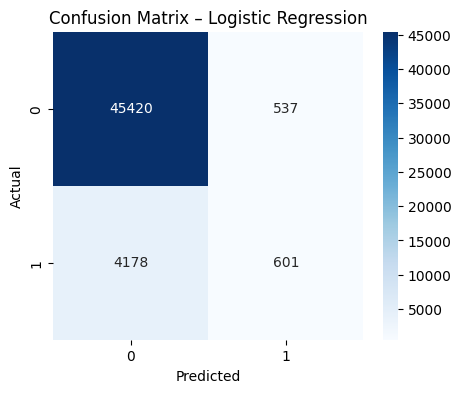


 Training Random Forest...


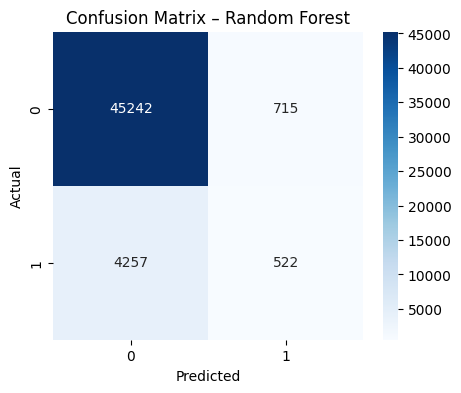


 Training XGBoost...


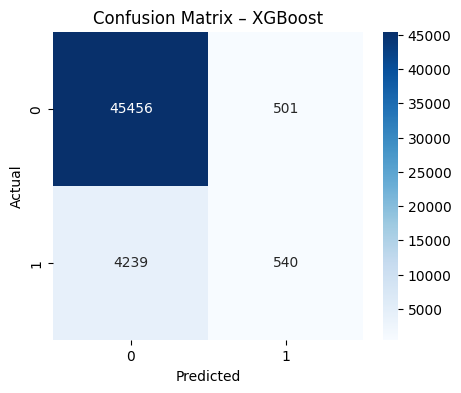


 Training LightGBM...
[LightGBM] [Info] Number of positive: 19114, number of negative: 183830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094184 -> initscore=-2.263590
[LightGBM] [Info] Start training from score -2.263590


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


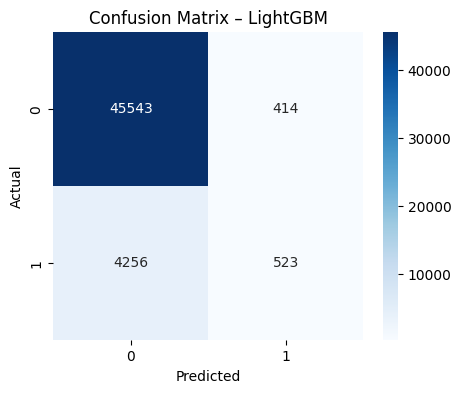


 Model Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
3,LightGBM,0.907955,0.880969,0.907955,0.878867
0,Logistic Regression,0.907068,0.879249,0.907068,0.880246
2,XGBoost,0.906575,0.877402,0.906575,0.878399
1,Random Forest,0.902003,0.867654,0.902003,0.874972


In [ ]:

# HEART DISEASE PREDICTION


# Install required libraries
!pip install xgboost lightgbm --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb

# Confusion Matrix Plot
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix – {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Load dataset
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/heartdisease.csv")

# Check target column
target_col = "target" if "target" in df.columns else df.columns[-1]

# Encode and scale
df = df.dropna().copy()
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss"),
    "LightGBM": lgb.LGBMClassifier()
}

results = []
for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    results.append([name, acc, prec, rec, f1])
    plot_confusion(y_test, y_pred, name)

results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1-Score"])
print("\n Model Comparison:")
display(results_df.sort_values("Accuracy", ascending=False))
